<a href="https://colab.research.google.com/github/ppotatoo/Capstone-Predictive-Modeling-for-Increasing-Adoption-Probability/blob/master/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns #시각화
from sklearn.preprocessing import StandardScaler # 차원 축소
from sklearn.decomposition import PCA #차원 축소
from sklearn.cluster import KMeans # 군집화 개수 정하기
import numpy as np 
import matplotlib
from matplotlib import font_manager, rc

In [ ]:
import matplotlib.font_manager
font_list = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
[matplotlib.font_manager.FontProperties(fname=font).get_name() for font in font_list if 'Nanum' in font]

['NanumMyeongjo',
 'NanumSquareRound',
 'NanumSquareRound',
 'NanumBarunGothic',
 'NanumBarunGothic',
 'NanumSquare',
 'NanumGothic',
 'NanumMyeongjo',
 'NanumSquare',
 'NanumGothic']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/캡스톤2_제주유기견/설문결과-Raw-Data.csv',sep=',')

의사결정나무나 랜덤포레스트하는데,
랜덤포레스트로 측정하고 의사결정나무해야함


In [ ]:
df.columns = ['인식매체','경험','인식','관심도','지식','구성원동의','환경','비용지불의사','정부지원정책','犬성별','중성화','나이','털길이','품종','색상','크기','성격','공고기간','입양희망여부','라-성','라-취','조사 나이대','성별','직업','직업기타']
real_df = df.drop(['직업','직업기타'], axis = 1) # 라이프 스타일, 직업 
# real_df = clean_df.drop(0,axis=0)
real_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   인식매체    300 non-null    int64
 1   경험      300 non-null    int64
 2   인식      300 non-null    int64
 3   관심도     300 non-null    int64
 4   지식      300 non-null    int64
 5   구성원동의   300 non-null    int64
 6   환경      300 non-null    int64
 7   비용지불의사  300 non-null    int64
 8   정부지원정책  300 non-null    int64
 9   犬성별     300 non-null    int64
 10  중성화     300 non-null    int64
 11  나이      300 non-null    int64
 12  털길이     300 non-null    int64
 13  품종      300 non-null    int64
 14  색상      300 non-null    int64
 15  크기      300 non-null    int64
 16  성격      300 non-null    int64
 17  공고기간    300 non-null    int64
 18  입양희망여부  300 non-null    int64
 19  라-성     300 non-null    int64
 20  라-취     300 non-null    int64
 21  조사 나이대  300 non-null    int64
 22  성별      300 non-null    int64
dtypes: int64(23)
me

In [ ]:
idx = real_df[real_df["입양희망여부"] == 3].index     #  인덱스의 값이 저장됨
real_df.drop(idx , inplace=True) # 해당 인덱스를 제거함

In [ ]:
old_range = {'경험':{2:0}, '인식매체':{2:0}, '입양희망여부' :{2:0}, '성별' : {2:0}} 
# 0 입양안한다, 1 한다,    성별 - 0 = 여자, 1 = 남자 , 인식매체 0 오프라인, 1 온라인,  경험 0 아니오, 1 예
rf_df = real_df.replace(old_range)
rf_df.shape

(204, 23)

In [ ]:
rf_df['입양희망여부'].value_counts(normalize = True)

1    0.5
0    0.5
Name: 입양희망여부, dtype: float64

In [ ]:
rf_df['입양희망여부']

0      1
1      0
2      0
4      0
5      1
      ..
289    1
291    0
292    1
295    0
299    0
Name: 입양희망여부, Length: 204, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(rf_df,
                                     test_size = 0.2, #test, train 나누는 비율
                                     stratify= rf_df['입양희망여부'],
                                     random_state = 1234)

In [ ]:
df_train.shape

(163, 23)

In [ ]:
df_test.shape

(41, 23)

In [ ]:
df_train['입양희망여부'].value_counts(normalize = True)

0    0.503067
1    0.496933
Name: 입양희망여부, dtype: float64

In [ ]:
df_test['입양희망여부'].value_counts(normalize = True)

1    0.512195
0    0.487805
Name: 입양희망여부, dtype: float64

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state = 1234, #난수 고정
                                  max_depth = 4) #나무 깊이

In [ ]:
train_x = df_train.drop(columns='입양희망여부') #예측 변수 추출
train_y = df_train['입양희망여부'] # 타겟 변수 추출

model = clf.fit(X=train_x,y = train_y) #모델 만들기

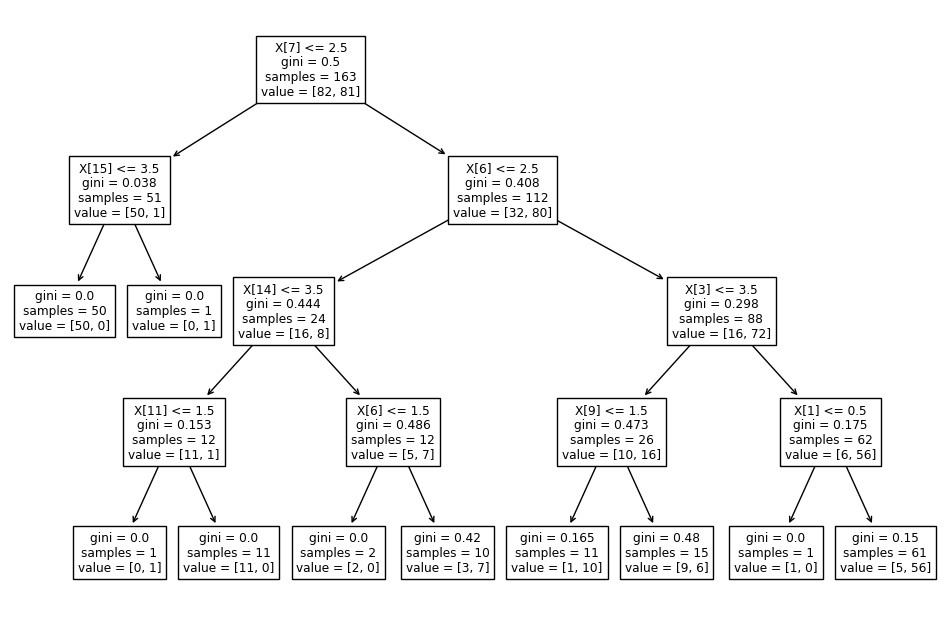

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize' : [12,8],
                     'figure.dpi' : '100'})
tree.plot_tree(model);

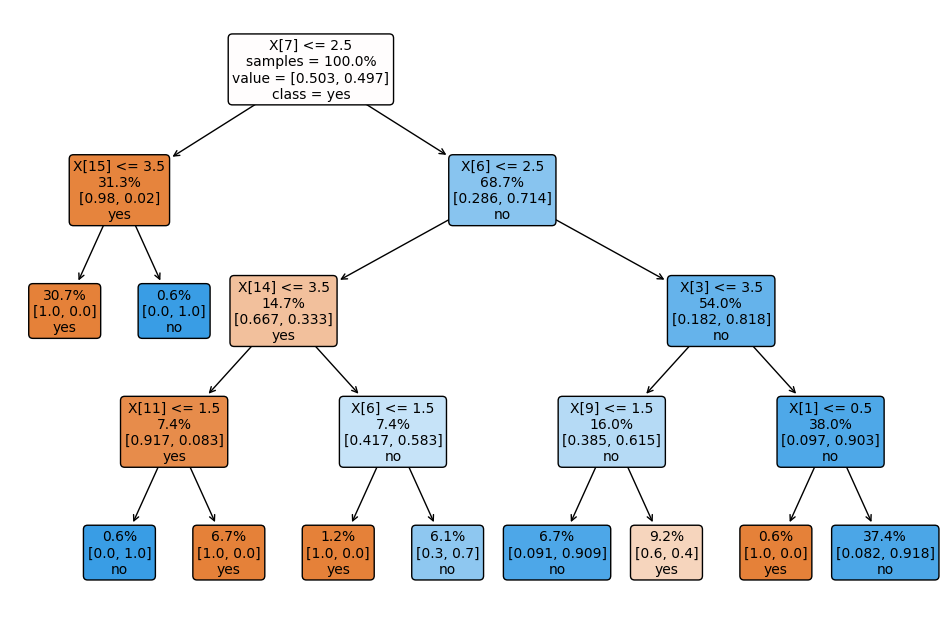

In [ ]:
tree.plot_tree(model,
              #  feature_names = train_x.columns, #예측 변수명
               class_names = ['yes','no'], #타겟 변수 클래스, 알파벳순
               proportion = True, #비율표기
               filled = True,
               rounded = True,
               impurity = False, #불순도 표기
               label = 'root', #라벨 표시 위치
               fontsize = 10);